# <u>CSC2034 Contemporary Topics: Data Science</u>

<span style="color:orange">**TODO:**<br>
                           **1. Make sure spelling is brittish and not american (e.g. analyze NOT analyse)**<br> 
                           **2. Make sure amount of paragraphs above and beneath code is consistent**<br>
                           **3. Add colour back to <u>red</u> and <u>white</u>**<br>

</span>

## Imports 

For this project I have used of the following libraries:

In [700]:
import sklearn as sk
import sklearn.metrics as metrics
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

<br>

# Task 1

For this task, I performed an Exploratory Data Analysis (EDA) on the <span style="color:darkred">**red**</span> and <span style="color:gainsboro">**white**</span> wine datasets. The performed analysis includes aggregations, computing summary statistics and plotting to create some foundations in understanding the `quality` feature in both sets. The obtained results, will then allow me to make a more exhaustive comparison between both sets' `quality`.

<u>Note:</u> Although the amount of<span style="color:gainsboro">**white**</span>wine samples(4898) is much greater than the<span style="color:darkred">**red**</span>wine samples(1599), throughout the project, I will focus on analyzing the set's features rather than possibly skewing the data by making the number of samples equal, since justifying feature differences by the quantity of samples would mean possibly ignoring actual correlations between variables. Therefore, the samples quantity difference between both sets, will only be highlighted **if relevant**.

## Task 1.a

Before plotting the data, retrieve the CSV data, and store it in a `pandas` DataFrame. After loading the values, I displayed a description of the `quality` column for each set.The descriptions gave an overview of the difference in `quality` for both sets, as well as in their samples.

In [ ]:
# Load the dataset from csv files
red_wine= pd.read_csv(filepath_or_buffer='winequality-red.csv', header=0, sep=';')
white_wine= pd.read_csv(filepath_or_buffer='winequality-white.csv', header=0, sep=';')

# Describe the<span style="color:darkred">**red**</span>wine samples in terms of quality
print("\n🔴Red Wine's Quality🔴:")
display(red_wine["quality"].describe())

# Describe the white wine samples in terms of quality
print("⚪White Wine's Quality⚪:")
display(white_wine["quality"].describe())


🔴Red Wine's Quality🔴:


count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

⚪White Wine's Quality⚪:


count    4898.000000
mean        5.877909
std         0.885639
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

<br>
To have a clearer illustration of the wine's `quality`, I created a `countplot` to visualise the `count` per every score.

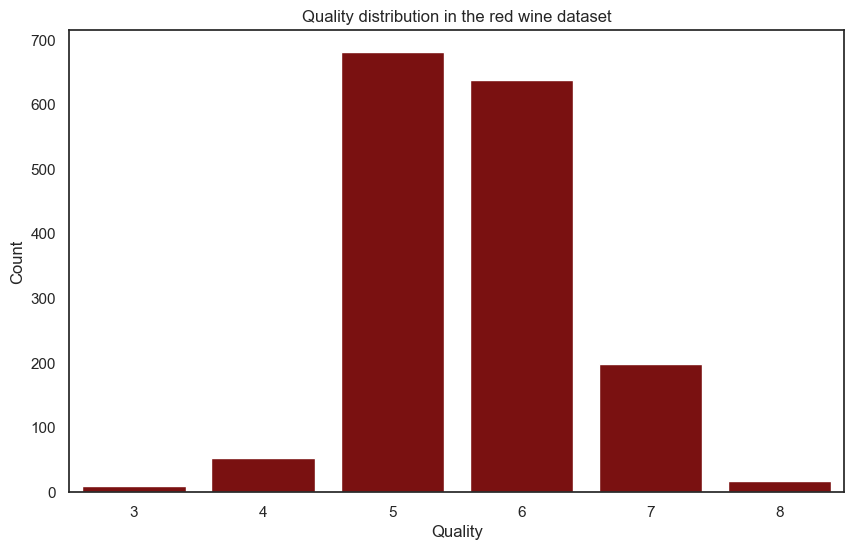

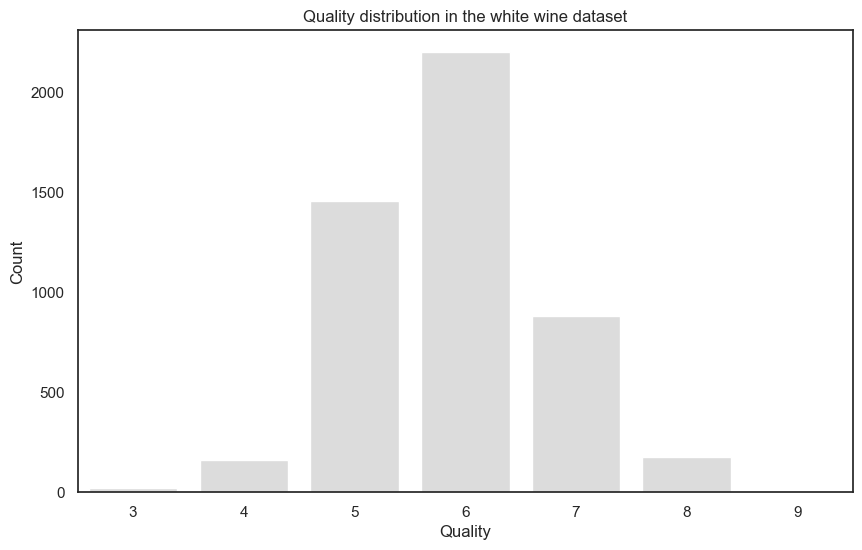

In [ ]:
# Plotting the distribution of quality in the<span style="color:darkred">**red**</span>wine dataset
plt.figure(figsize = (10, 6))
sns.countplot(x ="quality",data=red_wine, color="darkred")
plt.title("Quality distribution in the<span style="color:darkred">**red**</span>wine dataset")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()
plt.close()

# Plotting the distribution of quality in the white wine dataset
plt.figure(figsize = (10, 6))
sns.countplot(x ="quality",data=white_wine, color="gainsboro")
plt.title("Quality distribution in the white wine dataset")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()
plt.close()

<br>

## Task 1.b

To understand the correlations in `quality` with the other features, I discretised the alcohol content based on in distribution accross the samples. Each sample was assigned one of three categories from the variable `alcohol_cat`, which I added as a column to both sets. The variable `alcohol_cat` contains three categories `low`, `mid`, and `high`; the following rules were applied for the discretisation:

* `low` = alcohol < (average - alcohol's standard deviation)
* `mid` = (average - standard deviation) < alcohol < (average + alcohol's standard deviation) 
* `high` = alcohol > (average + alcohol's standard deviation) 

These categories will allow for a much easier analysis on the correlation between `quality` and `alcohol`.

In [ ]:
# Discretise alcohol contents by creating a new column 'alcohol_cat' in the<span style="color:darkred">**red**</span>wine dataset
red_wine['alcohol_cat'] = ['low' if x < red_wine['alcohol'].mean()-red_wine['alcohol'].std() 
                           else 'mid' if red_wine['alcohol'].mean()-red_wine['alcohol'].std() < x < red_wine['alcohol'].mean()+red_wine['alcohol'].std() 
                           else 'high' for x in red_wine['alcohol']]

# Discretise alcohol contents by creating a new column 'alcohol_cat' in the white wine dataset
white_wine['alcohol_cat'] = ['low' if x < white_wine['alcohol'].mean()-white_wine['alcohol'].std() 
                           else 'mid' if white_wine['alcohol'].mean()-white_wine['alcohol'].std() < x < white_wine['alcohol'].mean()+white_wine['alcohol'].std() 
                           else 'high' for x in white_wine['alcohol']]

<br>

## Task 1.c

Now that `alcohol` has been discretised into `alcohol_cat`, I performed descriptions in the `quality` distribution such as in **Task 1.a** but separately into the three categories.

Also like in **Task 1.a**, I visualised the data to have a more **"human"** view of the distribution, however using a `boxplot` instead of a `countplot` to simultaneously compare each of the categories, 

🔴Red Wine's Alcohol Categories🔴:

🔴Category🔴: mid


count    1125.000000
mean        5.526222
std         0.746568
min         3.000000
25%         5.000000
50%         5.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

🔴Category🔴: low


count    194.000000
mean       5.247423
std        0.611308
min        3.000000
25%        5.000000
50%        5.000000
75%        6.000000
max        7.000000
Name: quality, dtype: float64

🔴Category🔴: high


count    280.000000
mean       6.346429
std        0.755853
min        4.000000
25%        6.000000
50%        6.000000
75%        7.000000
max        8.000000
Name: quality, dtype: float64


⚪White Wine's Alcohol Categories⚪:

⚪Category⚪: low


count    845.000000
mean       5.547929
std        0.814057
min        3.000000
25%        5.000000
50%        5.000000
75%        6.000000
max        8.000000
Name: quality, dtype: float64

⚪Category⚪: mid


count    3121.000000
mean        5.766741
std         0.821620
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

⚪Category⚪: high


count    932.000000
mean       6.549356
std        0.819165
min        3.000000
25%        6.000000
50%        7.000000
75%        7.000000
max        9.000000
Name: quality, dtype: float64

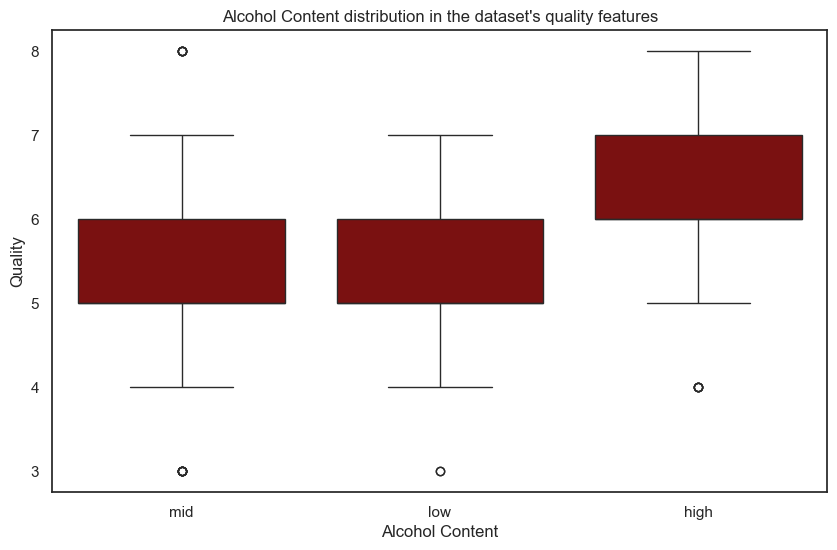

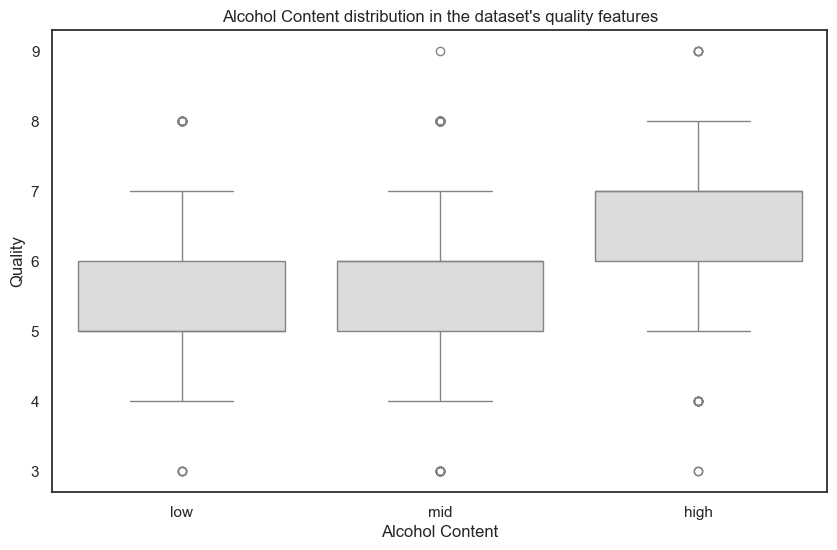

In [704]:
# Describe the quality of<span style="color:darkred">**red**</span>wines based on alcohol categories
print("🔴Red Wine's Alcohol Categories🔴:\n")

for category in red_wine["alcohol_cat"].unique():
    red_wine_subset = red_wine[red_wine["alcohol_cat"] == category]
    print(f"🔴Category🔴: {category}")
    display(red_wine_subset["quality"].describe())
    
# Describe the quality of white wines based on alcohol categories
print("\n⚪White Wine's Alcohol Categories⚪:\n")

# Loop through each unique alcohol category in white wine and display the quality statistics
for category in white_wine["alcohol_cat"].unique():
    white_wine_subset = white_wine[white_wine["alcohol_cat"] == category]
    print(f"⚪Category⚪: {category}")
    display(white_wine_subset["quality"].describe())
    

# Plotting the distribution of alcohol content in<span style="color:darkred">**red**</span>wine samples
plt.figure(figsize = (10, 6))
sns.boxplot(x=red_wine["alcohol_cat"], y=red_wine["quality"], color="darkred")
plt.title("Alcohol Content distribution in the dataset's quality features")
plt.xlabel("Alcohol Content")
plt.ylabel("Quality")
plt.show()
plt.close()

# Plotting the distribution of alcohol content in white wine samples
plt.figure(figsize = (10, 6))
sns.boxplot(x=white_wine["alcohol_cat"], y=white_wine["quality"], color="gainsboro")
plt.title("Alcohol Content distribution in the dataset's quality features")
plt.xlabel("Alcohol Content")
plt.ylabel("Quality")
plt.show()
plt.close()

Based on the descriptions and the graphs, both <span style="color:darkred">**red**</span> **and** <span style="color:gainsboro">**white**</span>  wines with a `high` alcohol category have a higher quality feature than the samples with `mid` and `low` alcohol contents. 

This can be seen on the boxplots where `high` boxes show higher than the rest of categories. Although there are outliers from the `low` and `mid` categories that also achieve high quality scores, they are **rare**, and are not as **regular** as the whiskers and dots from the `high` category boxes.

<br>

## Task 1.d

The feature `residual_sugar` represents the amount of sugar per litre(mg/L) in a wine sample. I will discretize this column similarly to `alcohol` into a new variable called `isSweet` to further analyze its distribution and find its correlations with `quality`

Since the `residual_sugar` is not accurate for both <span style="color:darkred">**red**</span> and <span style="color:gainsboro">**white**</span> wines, and doesn't qualify as "sweet" according to  **Wine Folly's** guide (https://winefolly.com/deep-dive/sugar-in-wine-chart/); I found a threshold to evenly split each dataset:

**Red Wine:**
* dry = residual sugar < 2.11
* sweet = 2.11 < residual sugar

**White Wine:**
* dry = residual sugar < 5.20
* sweet = 5.20 < residual sugar

<br>
<br>

This split allows for a very even **sweet/dry** split for both wines:

**Red Wine:**
* Sweet = 849
* Dry = 750

**White Wine:**
* Sweet = 2458
* Dry = 2440

With this discretisation, I will be able to properly analyse the possible correlations between `quality` and the new variable `isSweet`.

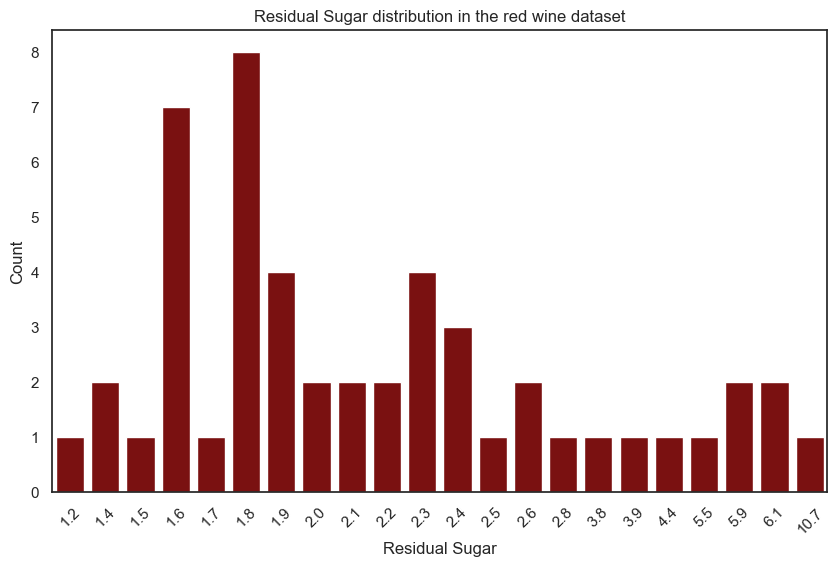

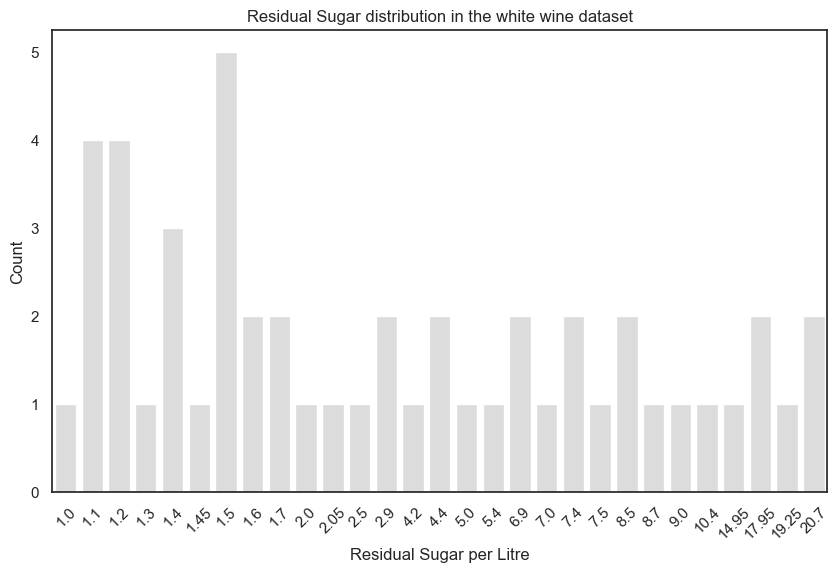

In [705]:
# Plotting the distribution of residual sugar in<span style="color:darkred">**red**</span>wine samples
plt.figure(figsize = (10, 6))
sns.countplot(x ="residual sugar",data=red_wine.head(50), color="darkred")
plt.title("Residual Sugar distribution in the<span style="color:darkred">**red**</span>wine dataset")
plt.xlabel("Residual Sugar")
plt.ylabel("Count")
plt.tick_params(axis='x', rotation=45)
plt.show()
plt.close()

# Plotting the distribution of residual sugar in white wine samples
plt.figure(figsize = (10, 6))
sns.countplot(x ="residual sugar",data=white_wine.head(50), color="gainsboro")
plt.title("Residual Sugar distribution in the white wine dataset")
plt.xlabel("Residual Sugar per Litre")
plt.ylabel("Count")
plt.tick_params(axis='x', rotation=45)
plt.show()
plt.close()

In [706]:
# Discretise residual sugar contents by creating a new column 'isSweet' in both datasets
red_wine["isSweet"] = ['dry' if x < 2.11 else 'sweet' for x in red_wine["residual sugar"]]
white_wine["isSweet"] = ['dry' if x < 5.2 else 'sweet' for x in white_wine["residual sugar"]]


# Count the number of sweet and dry<span style="color:darkred">**red**</span>wines
sweet=0
dry=0

for i in range(len(red_wine["isSweet"])):
    if red_wine["isSweet"][i] == 'sweet':
        sweet+=1
    else:
        dry+=1
print(f"🔴Red Wine's Residual Sugar🔴: \nSweet={sweet}"+"\n"+f"Dry={dry}\n")


# Count the number of sweet and dry white wines
sweet=0
dry=0

for i in range(len(white_wine["isSweet"])):
    if white_wine["isSweet"][i] == 'sweet':
        sweet+=1
    else:
        dry+=1
        
print(f"⚪White Wine's  Residual Sugar⚪: \nSweet={sweet}"+"\n"+f"Dry={dry}")

🔴Red Wine's Residual Sugar🔴: 
Sweet=849
Dry=750

⚪White Wine's  Residual Sugar⚪: 
Sweet=2458
Dry=2440


<br>

## Task 1.e

After obtaining the number of samples considered `dry` and `sweet`, I created another `boxplot` to analyze the distribution of `residual_sugar` and find if its correlated with `quality`, in a similar way to **Task 1.d**.

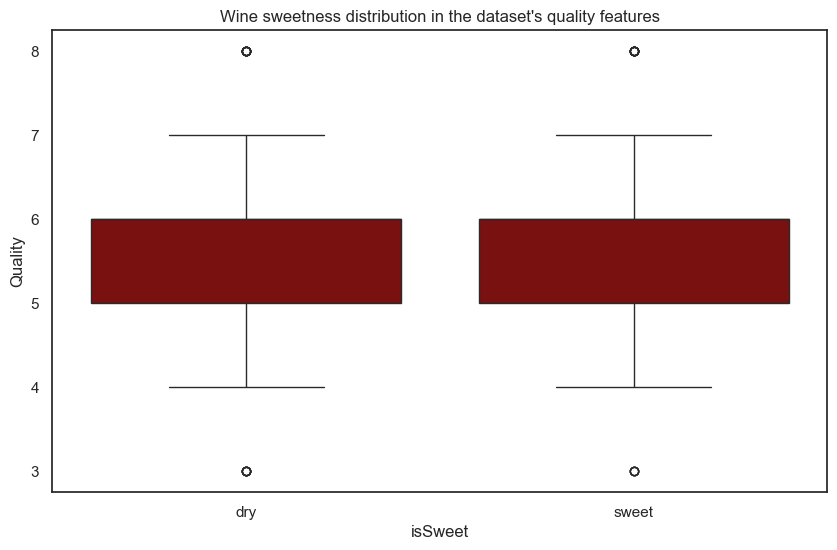

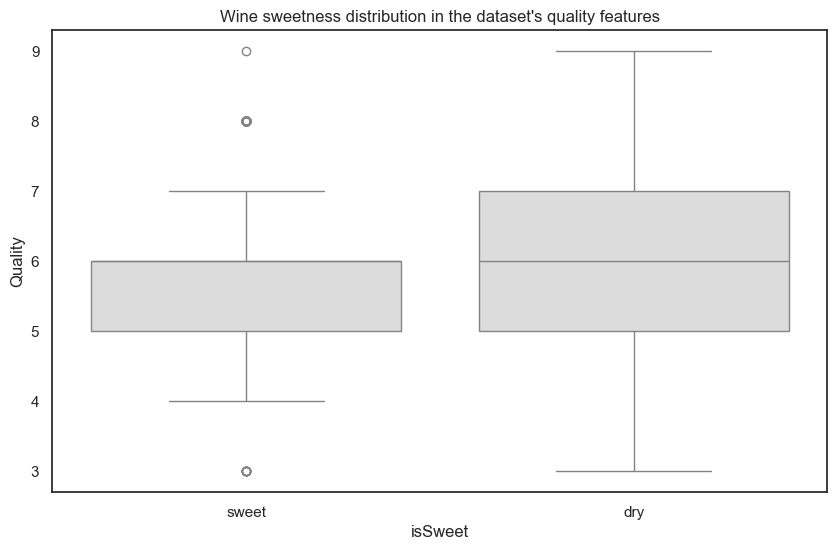

In [707]:
# Plotting the distribution of wine sweetness in<span style="color:darkred">**red**</span>wine samples
plt.figure(figsize = (10, 6))
sns.boxplot(x=red_wine["isSweet"], y=red_wine["quality"], color="darkred")
plt.title("Wine sweetness distribution in the dataset's quality features")
plt.ylabel("Quality")
plt.show()
plt.close()

# Plotting the distribution of wine sweetness in white wine samples
plt.figure(figsize = (10, 6))
sns.boxplot(x=white_wine["isSweet"], y=white_wine["quality"], color="gainsboro")
plt.title("Wine sweetness distribution in the dataset's quality features")
plt.ylabel("Quality")
plt.show()
plt.close()

After analysing the graph, the <span style="color:darkred">**red**</span> wine samples' `quality` seems to be perceived about the same for both sweet and dry wines, with most of the samples scoring between 5 and 6 in `quality`, with outliers between 3 and 8.

However, for <span style="color:gainsboro">**white**</span> wines samples' `quality` is perceived higher for dry wines than for sweet wines. This is due to most of the dry samples scoring between 5 to 7 in `quality`, while sweet samples mainly score between 5 to 6. Sweet <span style="color:gainsboro">**white**</span> wines, do score higher than sweet <span style="color:darkred">**red**</span> wines, by having outlying samples in 8 and 9; which is a score (1 point) higher than <span style="color:darkred">**red**</span> wines.

But, dry <span style="color:gainsboro">**white**</span> wines have more consistent outliers from 7 to 9, which shows a higher perceived quality than the sweeter samples. However it also has consistent outliers perceived between 3 to 5 in perceived quality, which shows that dry samples can also have poorer quality than sweet <span style="color:gainsboro">**white**</span> wines and all <span style="color:darkred">**red**</span> wines.

# Extension 1:

As an extension to this task, I performed an additional descriptive analysis, by illustrating `quality` with respect to both `isSweet` and `alcohol_cat` in a `barplot`. This analysis demonstrates how `quality` is represented differently, when analyzing separately for <span style="color:darkred">**red**</span> and <span style="color:gainsboro">**white**</span> wines, and also in a **combined** set of both wines . 


🔴Red Wine's Further Analysis🔴:

⚪White Wine's Further Analysis⚪:

🔴⚪Combined Dataset Analysis⚪🔴:


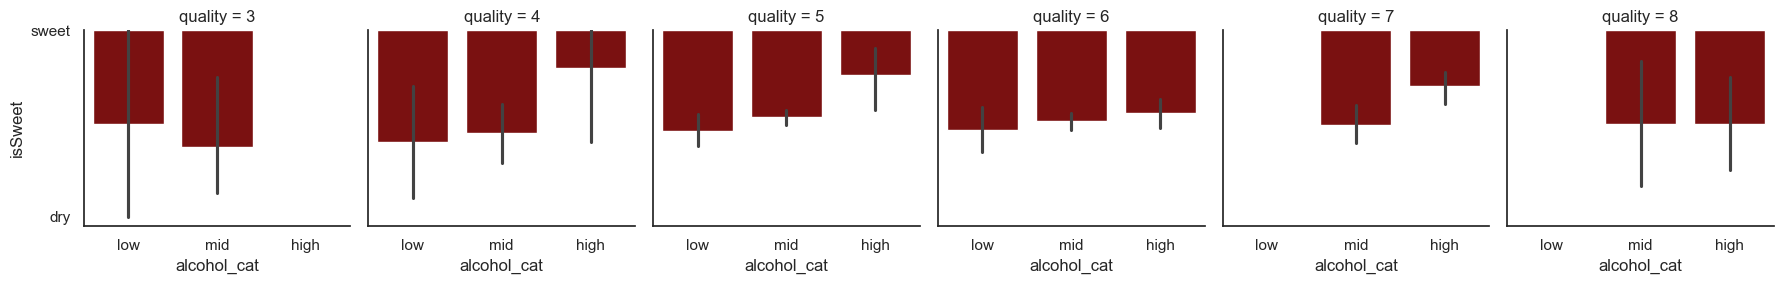

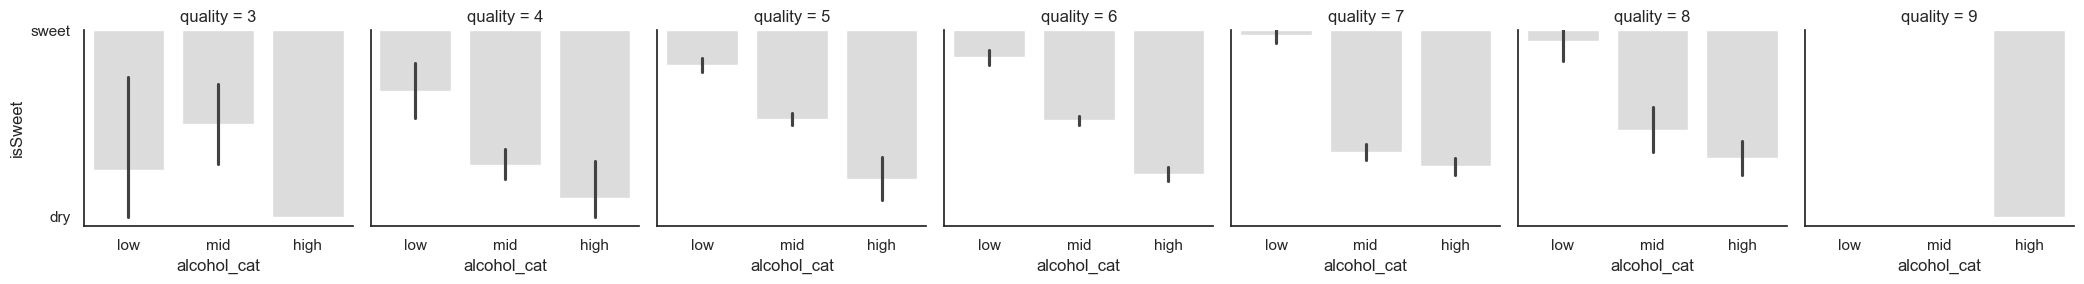

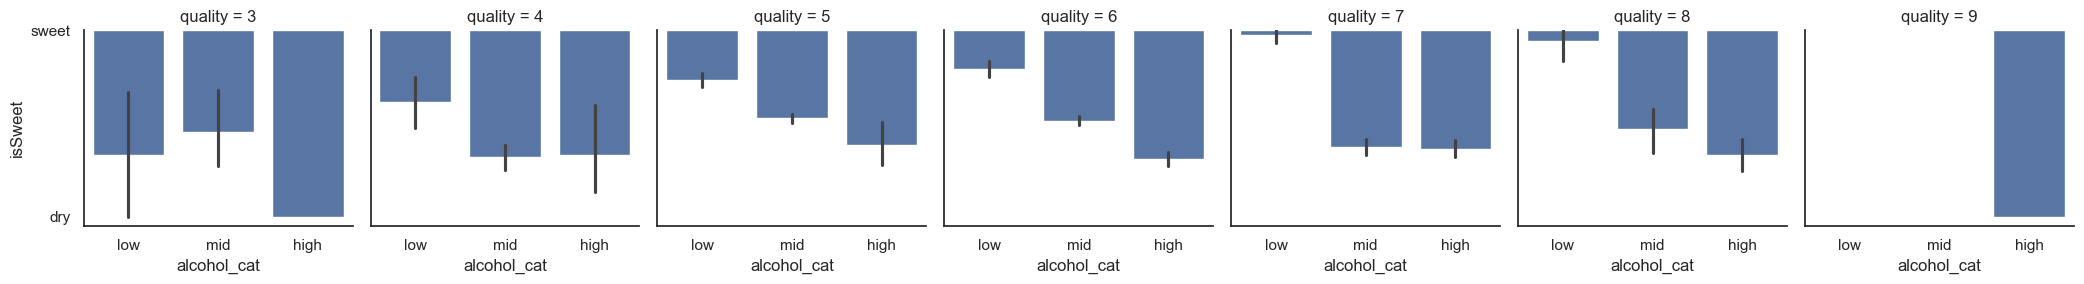

In [708]:
# Add a new column to each dataset to indicate the wine type
red_wine["wine_type"] = 0
white_wine["wine_type"] = 1

# Join the two datasets
wine_data = pd.concat([red_wine, white_wine], axis=0, ignore_index=True)


print("\n🔴Red Wine's Further Analysis🔴:")
grid = sns.FacetGrid(red_wine, col="quality")
grid.map(sns.barplot, "alcohol_cat", "isSweet", order=["low", "mid", "high"], color="darkred")

print("\n⚪White Wine's Further Analysis⚪:")
grid = sns.FacetGrid(white_wine, col="quality")
grid.map(sns.barplot, "alcohol_cat", "isSweet", order=["low", "mid", "high"], color="gainsboro")

print("\n🔴⚪Combined Dataset Analysis⚪🔴:")
grid = sns.FacetGrid(wine_data, col="quality")
grid.map(sns.barplot, "alcohol_cat", "isSweet", order=["low", "mid", "high"])

The graphs shows that high-quality(7-8) <span style="color:darkred">**red**</span> wines are mainly sweet and containt a `high` amount of alcohol. While high-quality <span style="color:gainsboro">**white**</span> wines have a higher amount of alcohol, but with a wider range in between `sweet` and `dry`, however, mainly hovering around `sweet`.

As for the combined set, since the amount of <span style="color:gainsboro">**white**</span> wine samples is much higher than the <span style="color:darkred">**red**</span> samples, the resutls are very similar to the <span style="color:gainsboro">**white**</span> wine set, with a slight but greater concentration in sweeter than dry samples. 

<br>

# Task 2




For this task I found the variables that could most useful for the learning phase of a ML(Machine Learning) model. In order to find these features, I analysed each pair, and each variable's correlation to the outcome(`quality`).


For this Correlation Analysis, I displayed two methods of finding the values, similarly to **Task 1**, where the first representation is just the data, and the seocnd is an illustration:
1. I used `pandas`' `DataFrame.corr()` method to automatically generate the correlation value of each feature from each set. 
2. I used `seaborn`'s `heatmap` method to visualise these values for both sets in a more "human" manner.

🔴Red Wine's fixed acidity Correlation with Quality🔴:
0.1240516491132243
🔴Red Wine's volatile acidity Correlation with Quality🔴:
-0.39055778026400734
🔴Red Wine's citric acid Correlation with Quality🔴:
0.22637251431804142
🔴Red Wine's residual sugar Correlation with Quality🔴:
0.013731637340066277
🔴Red Wine's chlorides Correlation with Quality🔴:
-0.12890655993005273
🔴Red Wine's free sulfur dioxide Correlation with Quality🔴:
-0.05065605724427633
🔴Red Wine's total sulfur dioxide Correlation with Quality🔴:
-0.18510028892653785
🔴Red Wine's density Correlation with Quality🔴:
-0.17491922778334884
🔴Red Wine's pH Correlation with Quality🔴:
-0.05773139120538215
🔴Red Wine's sulphates Correlation with Quality🔴:
0.2513970790692614
🔴Red Wine's alcohol Correlation with Quality🔴:
0.4761663240011362
🔴Red Wine's wine_type Correlation with Quality🔴:
nan
⚪White Wine's fixed acidity Correlation with Quality⚪:
-0.11366283071301796
⚪White Wine's volatile acidity Correlation with Quality⚪:
-0.19472296892113428
⚪

C:\Users\dario\AppData\Roaming\Python\Python313\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\dario\AppData\Roaming\Python\Python313\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


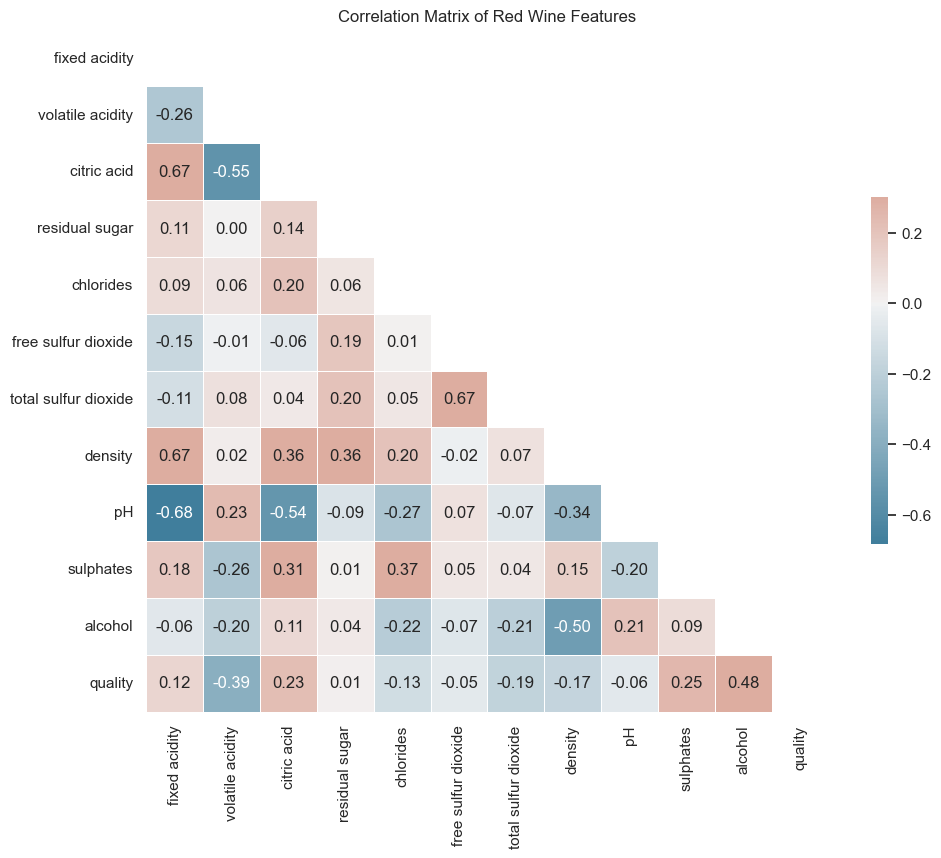

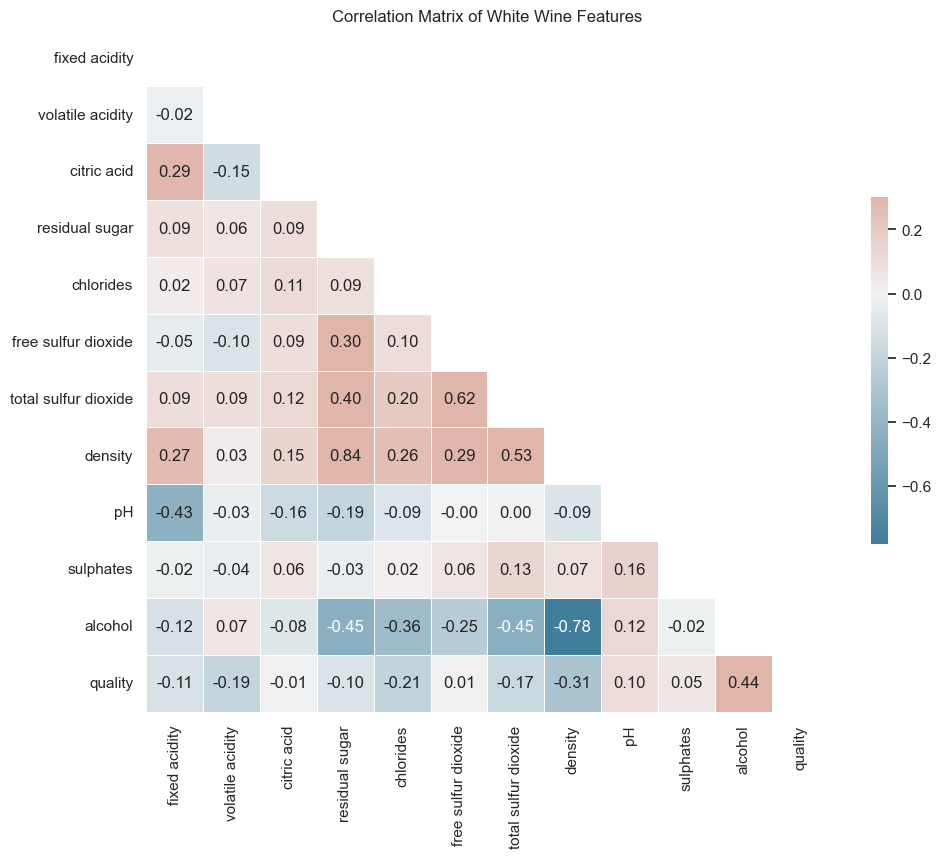

In [709]:
# Correlation of features with quality in<span style="color:darkred">**red**</span>wine dataset as text
for i in red_wine.columns:
    if i != "quality" and i != "alcohol_cat" and i != "isSweet":
        print(f"🔴Red Wine's {i} Correlation with Quality🔴:")
        print(red_wine[str(i)].corr(red_wine["quality"], method='pearson')) 

# Correlation of features with quality in white wine dataset as text
for i in white_wine.columns:
    if i != "quality" and i != "alcohol_cat" and i != "isSweet":
        print(f"⚪White Wine's {i} Correlation with Quality⚪:")
        print(white_wine[str(i)].corr(white_wine["quality"]))
        
# Create subsets of float features for correlation analysis
red_wine_subset = red_wine[["fixed acidity",	"volatile acidity", "citric acid", 
                           "residual sugar", "chlorides", "free sulfur dioxide", 
                           "total sulfur dioxide", "density", "pH", "sulphates",
                           "alcohol", "quality"]]
white_wine_subset = white_wine[["fixed acidity",	"volatile acidity", "citric acid", 
                           "residual sugar", "chlorides", "free sulfur dioxide", 
                           "total sulfur dioxide", "density", "pH", "sulphates",
                           "alcohol", "quality"]]

# Calculate the correlation matrix for the<span style="color:darkred">**red**</span>wine subset
red_wine_corr = red_wine_subset.corr()
mask = np.triu(np.ones_like(red_wine_corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(red_wine_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f")
plt.title("Correlation Matrix of<span style="color:darkred">**red**</span>Wine Features")
plt.show()


# Calculate the correlation matrix for the white wine subset
white_wine_corr = white_wine_subset.corr()
plt.figure(figsize=(11, 9))
mask = np.triu(np.ones_like(white_wine_corr, dtype=bool))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(white_wine_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f")
plt.title("Correlation Matrix of White Wine Features")
plt.show()

From the resulting Correlation Matrixes, there are a few variables with a correlation to `quality`:

<br> 

In 🔴Red Wine🔴:

* Most Positive Correlations(correlation > 0.10): **Alcohol**, **Sulphates**, **Citric Acid**, **Fixed Acidity**

* Most Negative Correlations(correlation < -0.10): **Volatile Acidity**, **Chlorides**, **Total Sulfur Dioxide**, **Density**

* Uncorrelated features (-0.10 < correlation < 0.10): **Residual Sugar**, **Free Sulfur Dioxide**, **pH**

    To see these correlations for <span style="color:darkred">**red**</span> wine was quite surprising, since I assumed **Residual Sugar** would have a higher correlation with quality, due to its impact in the graphs seen in **Task 1**

<br> 

<br>

In ⚪White Wine⚪:

* Most Positive Correlations(correlation > 0.10): **Alcohol**

* Most Negative Correlations(correlation < -0.10): **Fixed Acidity**, **Volatile Acidity**, **Chlorides**, **Total Sulfur Dioxide**, **Density**

* Uncorrelated features (-0.10 <= correlation <= 0.10): **Citric Acid**, **Residual Sugar**, **Free Sulfur Dioxide**, **pH**, **Sulphates**

    Like with <span style="color:darkred">**red**</span> wine, I was suprised that `residual sugar` was uncorrelated with `quality` for the <span style="color:gainsboro">**white**</span> wine samples as well. This set also contains more negative correlations than positive (only one which is `alcohol`), however, this is not necessarily an issue, since the wine's quality could increase by having the quantity of these features reduced and viceversa.


# Task 3

For this task, I will create predictive model to predicting `quality` based on the <span style="color:darkred">**red**</span> and <span style="color:gainsboro">**white**</span> wine datasets. 

My approach to this task will be **regression** instead of **classification**, where `quality` will be considered a continous variable, instead of it being altered by introducing binary classification and thresholds. For this I have combined both winesets into one, with a subset of the most positively correlated features from both sets, based on the **Correlation Matrix** above. 

In [710]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Add a new column to each dataset to indicate the wine type
red_wine["wine_type"] = 0
white_wine["wine_type"] = 1

# Join the two datasets
wine_data = pd.concat([red_wine, white_wine], axis=0, ignore_index=True)

# Create a subset of the dataset features based on the correlation analysis
wine_data_subset = wine_data[["fixed acidity", "citric acid", "sulphates", "alcohol", "quality"]]

# Define the features and target variable
data = wine_data_subset.drop(columns=["quality"])
labels = wine_data_subset["quality"]

# Split the dataset into training and testing sets
data_train, data_test, labels_train, labels_test = train_test_split(data, labels, test_size=0.2, random_state=42)


# Scale the train and test data
scaler = StandardScaler()

data_train_scaled = scaler.fit_transform(data_train)
data_test_scaled = scaler.transform(data_test)

To find the best parameters, for the model above, I created a random forest to find the best parameters for that could allow the model to learn and predict as accurately as possible.

In [711]:
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Initialize Random Forest for regression problem
random_forest = RandomForestRegressor(n_estimators=100, random_state=42) 

parameters_to_tune = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'max_features': ['sqrt', 'log2', None]
}

# Define the K-Fold cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform Grid Search with parameter and k-folds
grid_search = GridSearchCV(estimator=random_forest,
                           param_grid=parameters_to_tune,
                           cv=kf,
                           scoring='neg_mean_squared_error',
                           n_jobs=-1,
                           verbose=2)

# Fit the model with the training data
grid_search.fit(data_train_scaled, labels_train)

print(f"Best parameters set found: {grid_search.best_params_}")


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters set found: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


<br>

Now that we have the best posisble parameters, let's fit the random forest with these and display their **Mean Squared Error(MSE)** and **R<sup>2</sup>(Coefficient of Determination)**:

* **MSE**: Measures the average of the squared differences between values **predicted** by a model and the true values.
* **R<sup>2</sup> (or r<sup>2</sup>)**: Represents how much of the variation in the actual values is **explained** by the model.

Sources used:
* Encord: https://encord.com/glossary/mean-square-error-mse/#:~:text=A%20lower%20MSE%20indicates%20that,values%2C%20reflecting%20better%20overall%20performance.
* Nvidia Developer Platform: https://developer.nvidia.com/blog/a-comprehensive-overview-of-regression-evaluation-metrics/

<br>

# Extension 2

Based on the correlation matrix above, these are the variables with the highest correlation. Having these together in the same model should be avoided. To find which is most effective, two models should be trained, and compared in performance.

**Positive Correlated variables that are relevant to learning**:
1. density & total sulfur dioxide
2. total sulfur dioxide & free sulfur dioxide

#### 1. Testing Density and Total Sulfur Dioxide Pair:

In [712]:
# Model 1: Using only 'density' 
wine_data_subset_density = wine_data[["fixed acidity", "citric acid", "pH", "sulphates",
                                       "alcohol", "quality", "free sulfur dioxide", "density"]]

data_density = wine_data_subset_density.drop(columns=["quality"])
labels_density = wine_data_subset_density["quality"]
data_train_density, data_test_density, labels_train_density, labels_test_density = train_test_split(data_density, labels_density, test_size=0.2, random_state=42)
scaler_density = StandardScaler()
data_train_scaled_density = scaler_density.fit_transform(data_train_density)
data_test_scaled_density = scaler_density.transform(data_test_density)

# Initialize Random Forest for best parameters
best_params = grid_search.best_params_
random_forest_density = RandomForestRegressor(n_estimators=best_params['n_estimators'],
                                       max_depth=best_params['max_depth'],
                                       min_samples_split=best_params['min_samples_split'],
                                       min_samples_leaf=best_params['min_samples_leaf'],
                                       max_features=best_params['max_features'],
                                       random_state=42)

random_forest_density.fit(data_train_scaled_density, labels_train_density)
labels_pred_density = random_forest_density.predict(data_test_scaled_density)
mse_density = mean_squared_error(labels_test_density, labels_pred_density)
r2_density = r2_score(labels_test_density, labels_pred_density)

print("\nModel using only 'density'")
print(f"Test Set Mean Squared Error (density): {mse_density}")
print(f"Test Set R-squared (density): {r2_density}")

# Model 2: Using only 'total sulfur dioxide'
wine_data_subset_tsd = wine_data[["fixed acidity", "citric acid", "pH", "sulphates",
                                   "alcohol", "quality", "free sulfur dioxide", "total sulfur dioxide"]]

data_tsd = wine_data_subset_tsd.drop(columns=["quality"])
labels_tsd = wine_data_subset_tsd["quality"]
data_train_tsd, data_test_tsd, labels_train_tsd, labels_test_tsd = train_test_split(data_tsd, labels_tsd, test_size=0.2, random_state=42)
scaler_tsd = StandardScaler()
data_train_scaled_tsd = scaler_tsd.fit_transform(data_train_tsd)
data_test_scaled_tsd = scaler_tsd.transform(data_test_tsd)

# Initialize Random Forest for best parameters
random_forest_tsd = RandomForestRegressor(n_estimators=best_params['n_estimators'],
                                       max_depth=best_params['max_depth'],
                                       min_samples_split=best_params['min_samples_split'],
                                       min_samples_leaf=best_params['min_samples_leaf'],
                                       max_features=best_params['max_features'],
                                       random_state=42)

random_forest_tsd.fit(data_train_scaled_tsd, labels_train_tsd)
labels_pred_tsd = random_forest_tsd.predict(data_test_scaled_tsd)
mse_tsd = mean_squared_error(labels_test_tsd, labels_pred_tsd)
r2_tsd = r2_score(labels_test_tsd, labels_pred_tsd)

print("\nModel using only 'total sulfur dioxide'")
print(f"Test Set Mean Squared Error (total sulfur dioxide): {mse_tsd}")
print(f"Test Set R-squared (total sulfur dioxide): {r2_tsd}")


Model using only 'density'
Test Set Mean Squared Error (density): 0.37660715384615384
Test Set R-squared (density): 0.49006998391211276

Model using only 'total sulfur dioxide'
Test Set Mean Squared Error (total sulfur dioxide): 0.3788746153846154
Test Set R-squared (total sulfur dioxide): 0.48699981732876974


Like the first pair, the results for both variables have very small variance, therefore they are redundant

#### 2. Testing Total Sulfur Dioxide and Free Sulfur Dioxide Pair:

In [713]:
# Model 3: Using only 'total sulfur dioxide' 
wine_data_subset_tsd = wine_data[["fixed acidity", "citric acid", "pH", "sulphates",
                                   "alcohol", "quality", "residual sugar", "total sulfur dioxide"]]

data_tsd = wine_data_subset_tsd.drop(columns=["quality"])
labels_tsd = wine_data_subset_tsd["quality"]
data_train_tsd, data_test_tsd, labels_train_tsd, labels_test_tsd = train_test_split(data_tsd, labels_tsd, test_size=0.2, random_state=42)
scaler_tsd = StandardScaler()
data_train_scaled_tsd = scaler_tsd.fit_transform(data_train_tsd)
data_test_scaled_tsd = scaler_tsd.transform(data_test_tsd)

# Initialize Random Forest for best parameters
random_forest_tsd = RandomForestRegressor(n_estimators=best_params['n_estimators'],
                                       max_depth=best_params['max_depth'],
                                       min_samples_split=best_params['min_samples_split'],
                                       min_samples_leaf=best_params['min_samples_leaf'],
                                       max_features=best_params['max_features'],
                                       random_state=42)

random_forest_tsd.fit(data_train_scaled_tsd, labels_train_tsd)
labels_pred_tsd = random_forest_tsd.predict(data_test_scaled_tsd)
mse_tsd = mean_squared_error(labels_test_tsd, labels_pred_tsd)
r2_tsd = r2_score(labels_test_tsd, labels_pred_tsd)

print("\nModel using only 'total sulfur dioxide'")
print(f"Test Set Mean Squared Error (total sulfur dioxide): {mse_tsd}")
print(f"Test Set R-squared (total sulfur dioxide): {r2_tsd}")

# Model 4: Using only 'free sulfur dioxide' 
wine_data_subset_fsd = wine_data[["fixed acidity", "citric acid", "pH", "sulphates",
                                   "alcohol", "quality", "residual sugar", "free sulfur dioxide"]]

data_fsd = wine_data_subset_fsd.drop(columns=["quality"])
labels_fsd = wine_data_subset_fsd["quality"]
data_train_fsd, data_test_fsd, labels_train_fsd, labels_test_fsd = train_test_split(data_fsd, labels_fsd, test_size=0.2, random_state=42)
scaler_fsd = StandardScaler()
data_train_scaled_fsd = scaler_fsd.fit_transform(data_train_fsd)
data_test_scaled_fsd = scaler_fsd.transform(data_test_fsd)

# Initialize Random Forest for best parameters
random_forest_fsd = RandomForestRegressor(n_estimators=best_params['n_estimators'],
                                       max_depth=best_params['max_depth'],
                                       min_samples_split=best_params['min_samples_split'],
                                       min_samples_leaf=best_params['min_samples_leaf'],
                                       max_features=best_params['max_features'],
                                       random_state=42)

random_forest_fsd.fit(data_train_scaled_fsd, labels_train_fsd)
labels_pred_fsd = random_forest_fsd.predict(data_test_scaled_fsd)
mse_fsd = mean_squared_error(labels_test_fsd, labels_pred_fsd)
r2_fsd = r2_score(labels_test_fsd, labels_pred_fsd)

print("\nModel using only 'free sulfur dioxide'")
print(f"Test Set Mean Squared Error (free sulfur dioxide): {mse_fsd}")
print(f"Test Set R-squared (free sulfur dioxide): {r2_fsd}")


Model using only 'total sulfur dioxide'
Test Set Mean Squared Error (total sulfur dioxide): 0.3848416923076923
Test Set R-squared (total sulfur dioxide): 0.4789203329103052

Model using only 'free sulfur dioxide'
Test Set Mean Squared Error (free sulfur dioxide): 0.3805520961538461
Test Set R-squared (free sulfur dioxide): 0.4847284908632338


<br>

Based on these results, 'free sulfur dioxide' appears to be more effective than 'total sulfur dioxide' at predicting wine quality. The difference in performance is more noticeable here compared to the previous pairs.


Therefore, based on the comparisons between the two pairs and the **Correlation Matrix** in **Task 2**:
A suitable subset of variables for further learning would be:

##### **wine_data_subset = wine_data[["fixed acidity", "free sulfur dioxide", "density ", "citric acid", "pH", "sulphates","alcohol"]]**

In [714]:
# Create the specified subset of the dataset features
wine_data_subset = wine_data[["fixed acidity", "free sulfur dioxide", "density",
                               "citric acid", "pH", "sulphates", "alcohol", "quality"]]

# Define the features and target variable
data = wine_data_subset.drop(columns=["quality"])
labels = wine_data_subset["quality"]

# Split the dataset into training and testing sets
data_train, data_test, labels_train, labels_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Scale the train and test data
scaler = StandardScaler()
data_train_scaled = scaler.fit_transform(data_train)
data_test_scaled = scaler.transform(data_test)

# Initialize Random Forest for best parameters
random_forest = RandomForestRegressor(n_estimators=best_params['n_estimators'],
                                       max_depth=best_params['max_depth'],
                                       min_samples_split=best_params['min_samples_split'],
                                       min_samples_leaf=best_params['min_samples_leaf'],
                                       max_features=best_params['max_features'],
                                       random_state=42)


# Fit the model with the training data
random_forest.fit(data_train_scaled, labels_train)

# Make predictions on the test set
labels_pred = random_forest.predict(data_test_scaled)

# Calculate the Mean Squared Error and R-squared scores for the test set
mse = mean_squared_error(labels_test, labels_pred)
r2 = r2_score(labels_test, labels_pred)

print("\nPerformance with the specified subset of variables")
print(f"Test Set Mean Squared Error: {mse}")
print(f"Test Set R-squared: {r2}")


Performance with the specified subset of variables
Test Set Mean Squared Error: 0.37710003846153844
Test Set R-squared: 0.48940261299978205


Unfortunately, the results produced by this subset, leads to a slightly worse performance with an **MSE** of **** and an **R<sup>2</sup>** of ****.

Which means that the learning executed with this subset, was not as successful as expected. For further learning, I will ensure to carry out a more careful correlation analysis, and test pairs with lower rates of correlation to achieved higher accuracy and generalisation from the regression model.

<br>

# Task 4
In order to evaluate the regression model, I used K-Fold Cross Validation to perform MSE and R-Squared(r^2) reports on performance.

* **R-Squared** is a statistical measure, also known as the coefficient of determination, that indicates the proportion of the variance in the dependent variable (in this case `quality`) that is predictable from the independent variables.

In [719]:
# Perform cross-validation and get the MSE scores
neg_mse_scores = cross_val_score(random_forest, data_train_scaled, labels_train, cv=kf, scoring='neg_mean_squared_error')
mse_scores = -neg_mse_scores 

# Perform cross-validation and get the R-squared scores
r2_scores = cross_val_score(random_forest, data_train_scaled, labels_train, cv=kf, scoring='r2')

print("K-Fold Cross-Validation Results:")
print(f"MSE:{mse_scores}")
print(f"R-squared: {r2_scores}")

# Fit the model with best parameters for the training data
random_forest.fit(data_train_scaled, labels_train)

# Make predictions on the training set
random_forest_labels_predictions = random_forest.predict(data_train_scaled)

# Calculate the Mean Squared Error and R-squared scores for training set
random_forest_mse_test = mean_squared_error(labels_train, random_forest_labels_predictions)
random_forest_r2_test= r2_score(labels_train, random_forest_labels_predictions)

print("\nTrain Set Performance (after cross-validation):")
print(f"Mean Squared Error: {random_forest_mse_test}")
print(f"R-squared: {random_forest_r2_test}")

# Make predictions on the test set
random_forest_labels_predictions = random_forest.predict(data_test_scaled)

# Calculate the Mean Squared Error and R-squared scores for test set
random_forest_mse_test = mean_squared_error(labels_test, random_forest_labels_predictions)
random_forest_r2_test= r2_score(labels_test, random_forest_labels_predictions)

print("\nTest Set Performance (after cross-validation):")
print(f"Mean Squared Error: {random_forest_mse_test}")
print(f"R-squared: {random_forest_r2_test}")

K-Fold Cross-Validation Results:
MSE:[0.45820543 0.37621014 0.40676631 0.41182267 0.39274909]
R-squared: [0.4519155  0.49414042 0.48046902 0.45392019 0.45464628]

Train Set Performance (after cross-validation):
Mean Squared Error: 0.05238736290167404
R-squared: 0.9318195745694464

Test Set Performance (after cross-validation):
Mean Squared Error: 0.37710003846153844
R-squared: 0.48940261299978205


The comparison between the Train and Test set performances indicate a high degree of overfitting. Therefore, to improve the performance, I will perform hyperparameter again, to decrease the complexity of the random forest.